In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Setting up a database and initial quick exploration

In [48]:
path = '/Users/nursahkurt/Desktop/Moosic/data/df_audio_features_5000.csv'
audio_features_df_original = pd.read_csv(path, index_col=[0,
                                                 # 'id',
                                                 1])
audio_features_df_original.rename(columns=lambda x: x.strip(), inplace=True)
audio_features_df_original.sample(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.989000,0.596000,0.1040,0.2110,61.541,,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
Always On My Mind,Elvis Presley,0.358,0.38700,7,-14.342,1,0.0324,0.746000,0.012100,0.1190,0.4950,181.183,,218440,4,1B5Tp2Ml9nLlmTSJx8xVfI,https://open.spotify.com/track/1B5Tp2Ml9nLlmTS...
Cool Breeze,Big Youth,0.822,0.61600,8,-5.509,1,0.1810,0.250000,0.000012,0.1070,0.6650,83.692,,203093,4,2TF9pM5gfqgtrKHMYOKxPd,https://open.spotify.com/track/2TF9pM5gfqgtrKH...
Moves Like Jagger - Radio Edit,Maroon 5,0.719,0.73600,11,-5.534,0,0.0510,0.009020,0.000000,0.2880,0.6450,128.034,,201213,4,7Cux7dkU6orCBN4Cu5mVwk,https://open.spotify.com/track/7Cux7dkU6orCBN4...
"Straight, No Chaser",Thelonious Monk,0.465,0.35000,3,-12.977,1,0.0403,0.410000,0.279000,0.1350,0.6200,93.336,,688133,4,6YYu8qFzcY1ZyzzsJIQM12,https://open.spotify.com/track/6YYu8qFzcY1Zyzz...
Tobiume,Susumu Yokota,0.241,0.25400,6,-17.030,1,0.0416,0.994000,0.880000,0.0639,0.0378,139.131,,278693,5,4IQWc6rhJwpFrRKBLx27X6,https://open.spotify.com/track/4IQWc6rhJwpFrRK...
Against All Odds (Take a Look at Me Now) - 2016 Remaster,Phil Collins,0.580,0.49800,1,-6.901,1,0.0277,0.198000,0.000000,0.1320,0.1110,116.271,,206360,4,63CHa6rmamv9OsehkRD8oz,https://open.spotify.com/track/63CHa6rmamv9Ose...
Joyride,Roxette,0.631,0.77000,2,-5.315,1,0.0267,0.045700,0.000000,0.4810,0.7340,102.348,,263093,4,7CBy5lwwNECPDjsksQrxxB,https://open.spotify.com/track/7CBy5lwwNECPDjs...
"Hung, Drawn and Quartered",Cancer,0.280,0.96200,2,-9.075,1,0.1050,0.000008,0.075400,0.0999,0.1510,148.826,,204933,4,305qZ6Qqqdp0EK0AVwVSSV,https://open.spotify.com/track/305qZ6Qqqdp0EK0...


In [49]:
audio_features_df_original.sample(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
Carnaval Inesquecível Na Cidade Alta,Mundo Livre S/A,0.746,0.5570,0,-9.756,1,0.0609,0.0519,0.001880,0.0530,0.6930,150.165,,216067,4,4lnLWhIiUKxq4Rh898vkVk,https://open.spotify.com/track/4lnLWhIiUKxq4Rh...
Apelo,Brazilian Jazz,0.506,0.2520,2,-14.083,0,0.0502,0.9190,0.863000,0.1110,0.2000,74.917,,195600,4,4az3kPwzJjdQBb8bYaYhy0,https://open.spotify.com/track/4az3kPwzJjdQBb8...
"Baby, Baby",Amy Grant,0.702,0.9010,1,-4.450,1,0.0264,0.4260,0.001530,0.0368,0.9190,97.862,,236973,4,3IDsegNBHC4pjGCOMTQYlU,https://open.spotify.com/track/3IDsegNBHC4pjGC...
Jump - 2015 Remaster,Van Halen,0.572,0.8350,0,-6.219,1,0.0317,0.1710,0.000377,0.0702,0.7950,129.981,,241600,4,7N3PAbqfTjSEU1edb2tY8j,https://open.spotify.com/track/7N3PAbqfTjSEU1e...
Gib mir Sonne,Rosenstolz,0.541,0.6410,5,-4.042,1,0.0312,0.2000,0.000002,0.0807,0.1810,142.019,,241947,4,3sfKfoEJp8uR7syEMze89R,https://open.spotify.com/track/3sfKfoEJp8uR7sy...
Moves,Big Sean,0.808,0.5340,2,-6.123,1,0.2830,0.0417,0.000000,0.1360,0.3540,75.500,,142920,4,6Kd4EPrY9A4WBUFy5JaqEc,https://open.spotify.com/track/6Kd4EPrY9A4WBUF...
Pasarela,Ñejo & Dalmata,0.798,0.8210,7,-6.143,1,0.0596,0.0985,0.000006,0.1780,0.5250,95.004,,227467,4,1MfqPCs3Y722VK6zkWZ98Z,https://open.spotify.com/track/1MfqPCs3Y722VK6...
L'ocell,Joan Colomo,0.680,0.5460,0,-8.521,0,0.0284,0.7680,0.004380,0.1360,0.3520,123.029,,111080,3,7xdKS9c1dv054i2XIKauAD,https://open.spotify.com/track/7xdKS9c1dv054i2...
"Liebestraum, S. 541, No. 3",Franz Liszt,0.200,0.0377,3,-25.808,1,0.0428,0.9820,0.907000,0.6110,0.0374,75.129,,275827,3,5kOXNkG9ZWAn69stILZxaR,https://open.spotify.com/track/5kOXNkG9ZWAn69s...


In [50]:
audio_features_df_original.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instru

In [51]:
audio_features_df_original.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


## exploration plots

Text(0.5, 1.0, 'Audio tracks')

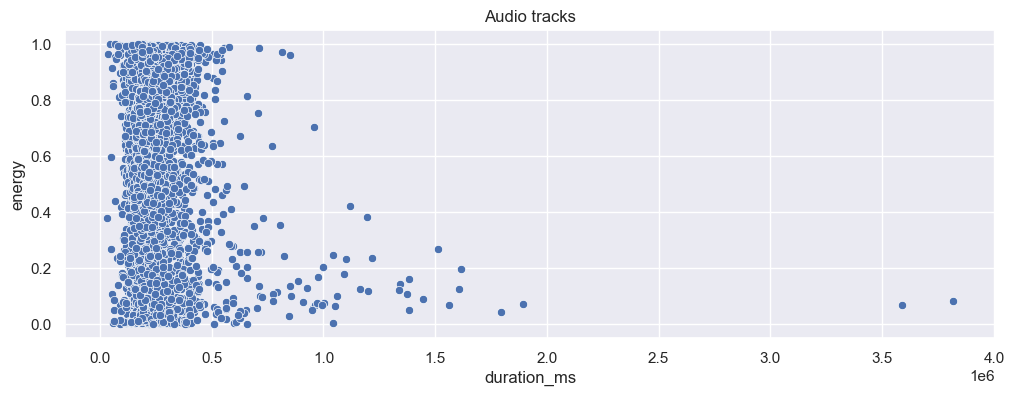

In [52]:
# scattered plot for two features
sns.set(rc = {'figure.figsize':(12,4)})
sns.scatterplot(data=audio_features_df_original, x='duration_ms', y='energy')
plt.title('Audio tracks')
# plt.show()

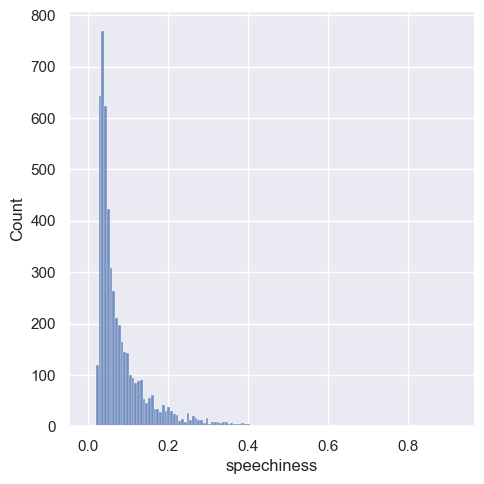

In [53]:
sns.set(rc={'figure.figsize':(30,10)})
sns.displot(audio_features_df_original, x="speechiness")

In [54]:
audio_features_df_original.sort_values('duration_ms', ascending=False).head(20)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
dlp 1.1,William Basinski,0.2800,0.0816,5,-31.702,1,0.0406,0.973,0.9380,0.1050,0.0669,95.380,,3815787,5,31FiS1jMI38kYfC8ey358W,https://open.spotify.com/track/31FiS1jMI38kYfC...
Symphony No. 6,Allan Pettersson,0.0864,0.0665,10,-26.515,0,0.0452,0.828,0.7970,0.1350,0.0387,77.880,,3590693,3,1HB8dwgqku7790ACIp6LAN,https://open.spotify.com/track/1HB8dwgqku7790A...
Symphony No. 3,Polish National Radio Symphony Orchestra,0.1860,0.0700,1,-23.465,1,0.0432,0.948,0.5760,0.2010,0.0370,102.053,,1893667,3,2dIpMRSyCUTT0d5kCjXlPJ,https://open.spotify.com/track/2dIpMRSyCUTT0d5...
Essence,Laraaji,0.1340,0.0424,0,-22.300,1,0.0448,0.976,0.9290,0.0581,0.0321,70.991,,1793760,3,4hBHEKTKdpGtP1AzsjNR8l,https://open.spotify.com/track/4hBHEKTKdpGtP1A...
"Tod und Verklärung Op.24, TrV 158",Richard Strauss,0.0798,0.1970,0,-15.453,1,0.0404,0.929,0.9270,0.3830,0.0340,82.476,,1615000,4,0khJ40OuZxPzLgLVC3bKZY,https://open.spotify.com/track/0khJ40OuZxPzLgL...
"Symphony No. 3, Op. 36: I. Lento - Sostenuto Tranquillo Ma Cantabile",Henryk Górecki,0.0840,0.1240,4,-19.494,0,0.0382,0.552,0.7680,0.1970,0.0331,84.415,,1607333,4,0AA32fvL7jCfCEyX1tRWRo,https://open.spotify.com/track/0AA32fvL7jCfCEy...
Symphony No. 9 in D Major: I. Andante comodo,Gustav Mahler,0.1730,0.0692,2,-20.987,1,0.0374,0.955,0.7120,0.1480,0.0400,131.965,,1562320,3,605mQZLXgVwbYjDsr1uhGi,https://open.spotify.com/track/605mQZLXgVwbYjD...
Amériques,Edgard Varèse,0.2280,0.2680,1,-20.355,1,0.0658,0.368,0.4460,0.3250,0.0568,133.392,,1512000,4,4ikMu2ZnsfONG1ngDtAPMn,https://open.spotify.com/track/4ikMu2ZnsfONG1n...
"Symphony No. 8 in C Minor, WAB 108 (1890 edition, ed. L. Nowak): IV. Finale: Feierlich, nicht schnell",Anton Bruckner,0.1970,0.0893,5,-19.377,0,0.0391,0.963,0.8630,0.6800,0.0379,112.144,,1445107,4,7xs1uO7mcpST4JyM8EteH8,https://open.spotify.com/track/7xs1uO7mcpST4Jy...


# Preprocessing the dataframe

## Dropping some features which doesn't impact

max value in "speechiness" is 0,576 - according to this and the feature description, no tracks in the playlist are 

In [55]:
audio_features_df = audio_features_df_original.drop(['id',
                                                     'html',
                                                     'loudness', # leaving this feature messes the whole picture
                                                     'key', # leaving this feature messes the whole picture
                                                     'duration_ms', # includes outliers, doesn't impact on "mood" or "style"
                                                     'liveness',
                                                     'mode',
                                                     'speechiness',
                                                     'time_signature',
                                                     'type'],
                                                    axis=1). copy()


In [56]:
audio_features_df.sample(10)

,,danceability,energy,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,
You'll Never See,Grave,0.167,0.979,0.000003,0.894000,0.124,149.778
Summer Teeth,Wilco,0.553,0.738,0.213000,0.000000,0.759,138.602
Angel of Death,Monstrosity,0.248,0.979,0.000320,0.765000,0.198,102.372
Helicopter - Video Edit,Martin Garrix,0.584,0.960,0.010400,0.516000,0.165,128.003
Team Zissou,Seu Jorge,0.619,0.402,0.870000,0.070200,0.792,93.237
Sweet Memories,CID,0.624,0.923,0.026800,0.000228,0.402,124.994
007 (Shanty Town),Desmond Dekker,0.860,0.575,0.066900,0.159000,0.846,101.715
"Alone, Pt. II",Alan Walker,0.670,0.668,0.536000,0.000000,0.608,88.033
Peggy Sue,Buddy Holly,0.676,0.424,0.947000,0.000494,0.493,148.373


In [57]:
audio_features_df.describe()

,danceability,energy,acousticness,instrumentalness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.509503,0.653565,0.290043,0.257337,0.443596,118.721407
std,0.218041,0.288335,0.355985,0.370686,0.277725,28.568463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309000,0.479000,0.002450,0.000001,0.196000,96.174000
50%,0.539000,0.738000,0.095400,0.001880,0.417000,119.180000
75%,0.688000,0.893000,0.565500,0.643000,0.677000,134.019000
max,0.967000,1.000000,0.996000,0.985000,0.985000,213.990000


## MinMax scaling

In [58]:
df_sk_pre = MinMaxScaler().fit_transform(audio_features_df)
audio_features_df_minmax = pd.DataFrame(df_sk_pre, columns=audio_features_df.columns, index=audio_features_df.index)
audio_features_df_minmax

,,danceability,energy,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.696787,0.000060,0.310660,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.217871,0.000002,0.703553,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.454819,0.000064,0.918782,0.437862
Mulher Eu Sei,Chico César,0.729059,0.05020,0.882530,0.000041,0.531980,0.499098
Rosa Morena,Kurt Elling,0.673216,0.11900,0.919679,0.000348,0.408122,0.565171
...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.920683,0.725888,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.858434,0.432487,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.954819,0.983756,0.034924,0.334469


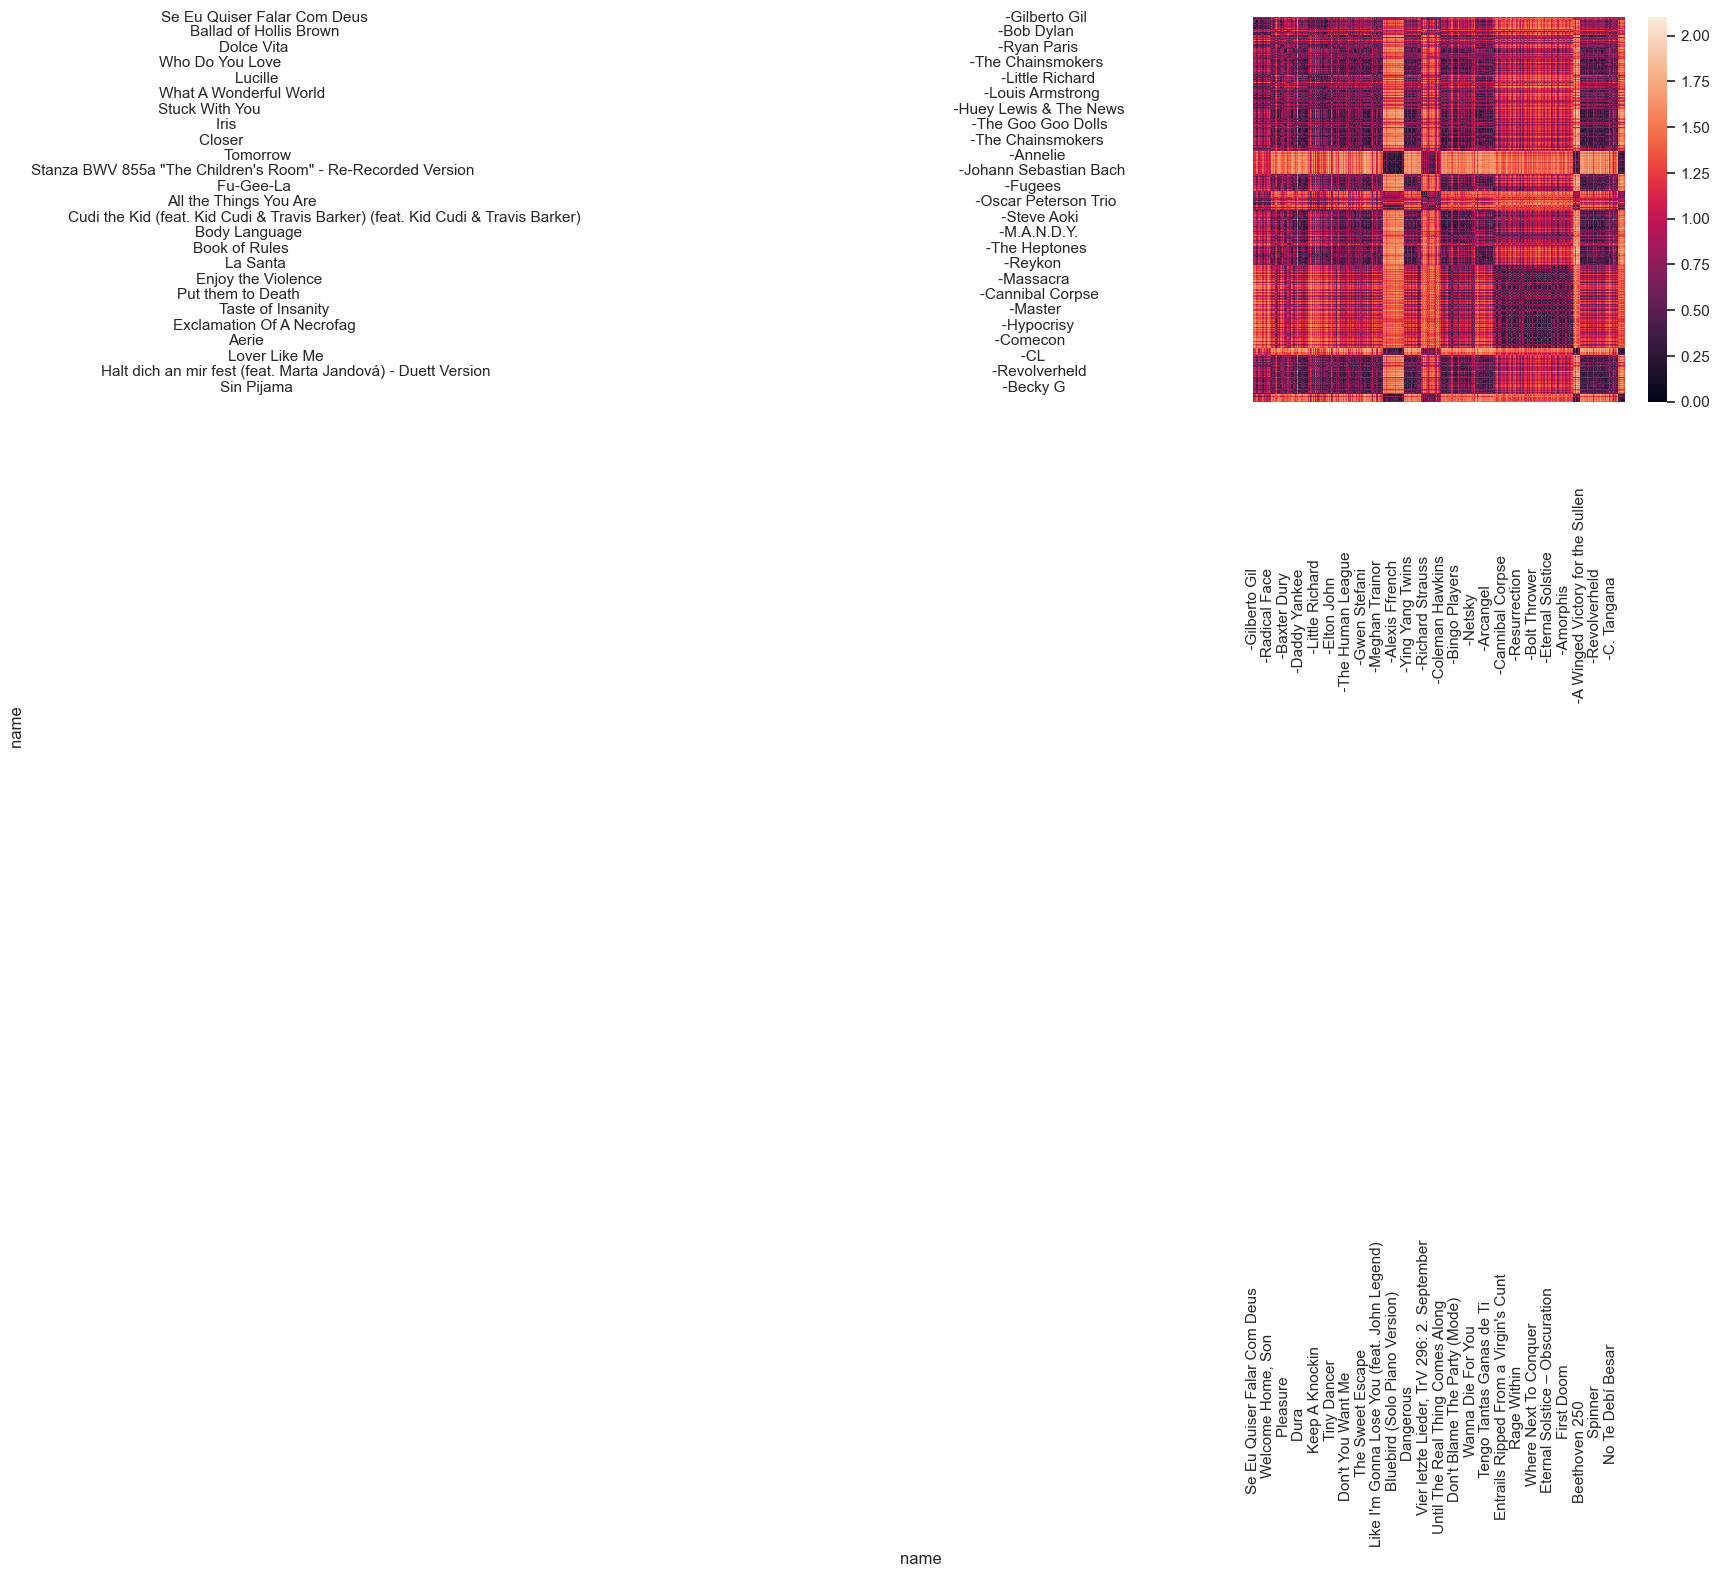

In [59]:
# Euclidean (by default)
eucl_minmax = pd.DataFrame(pairwise_distances(audio_features_df_minmax),
                    index=audio_features_df_minmax.index,
                    columns=audio_features_df_minmax.index)
eucl_minmax

plt.subplots(figsize=(6, 5))
sns.heatmap(eucl_minmax);

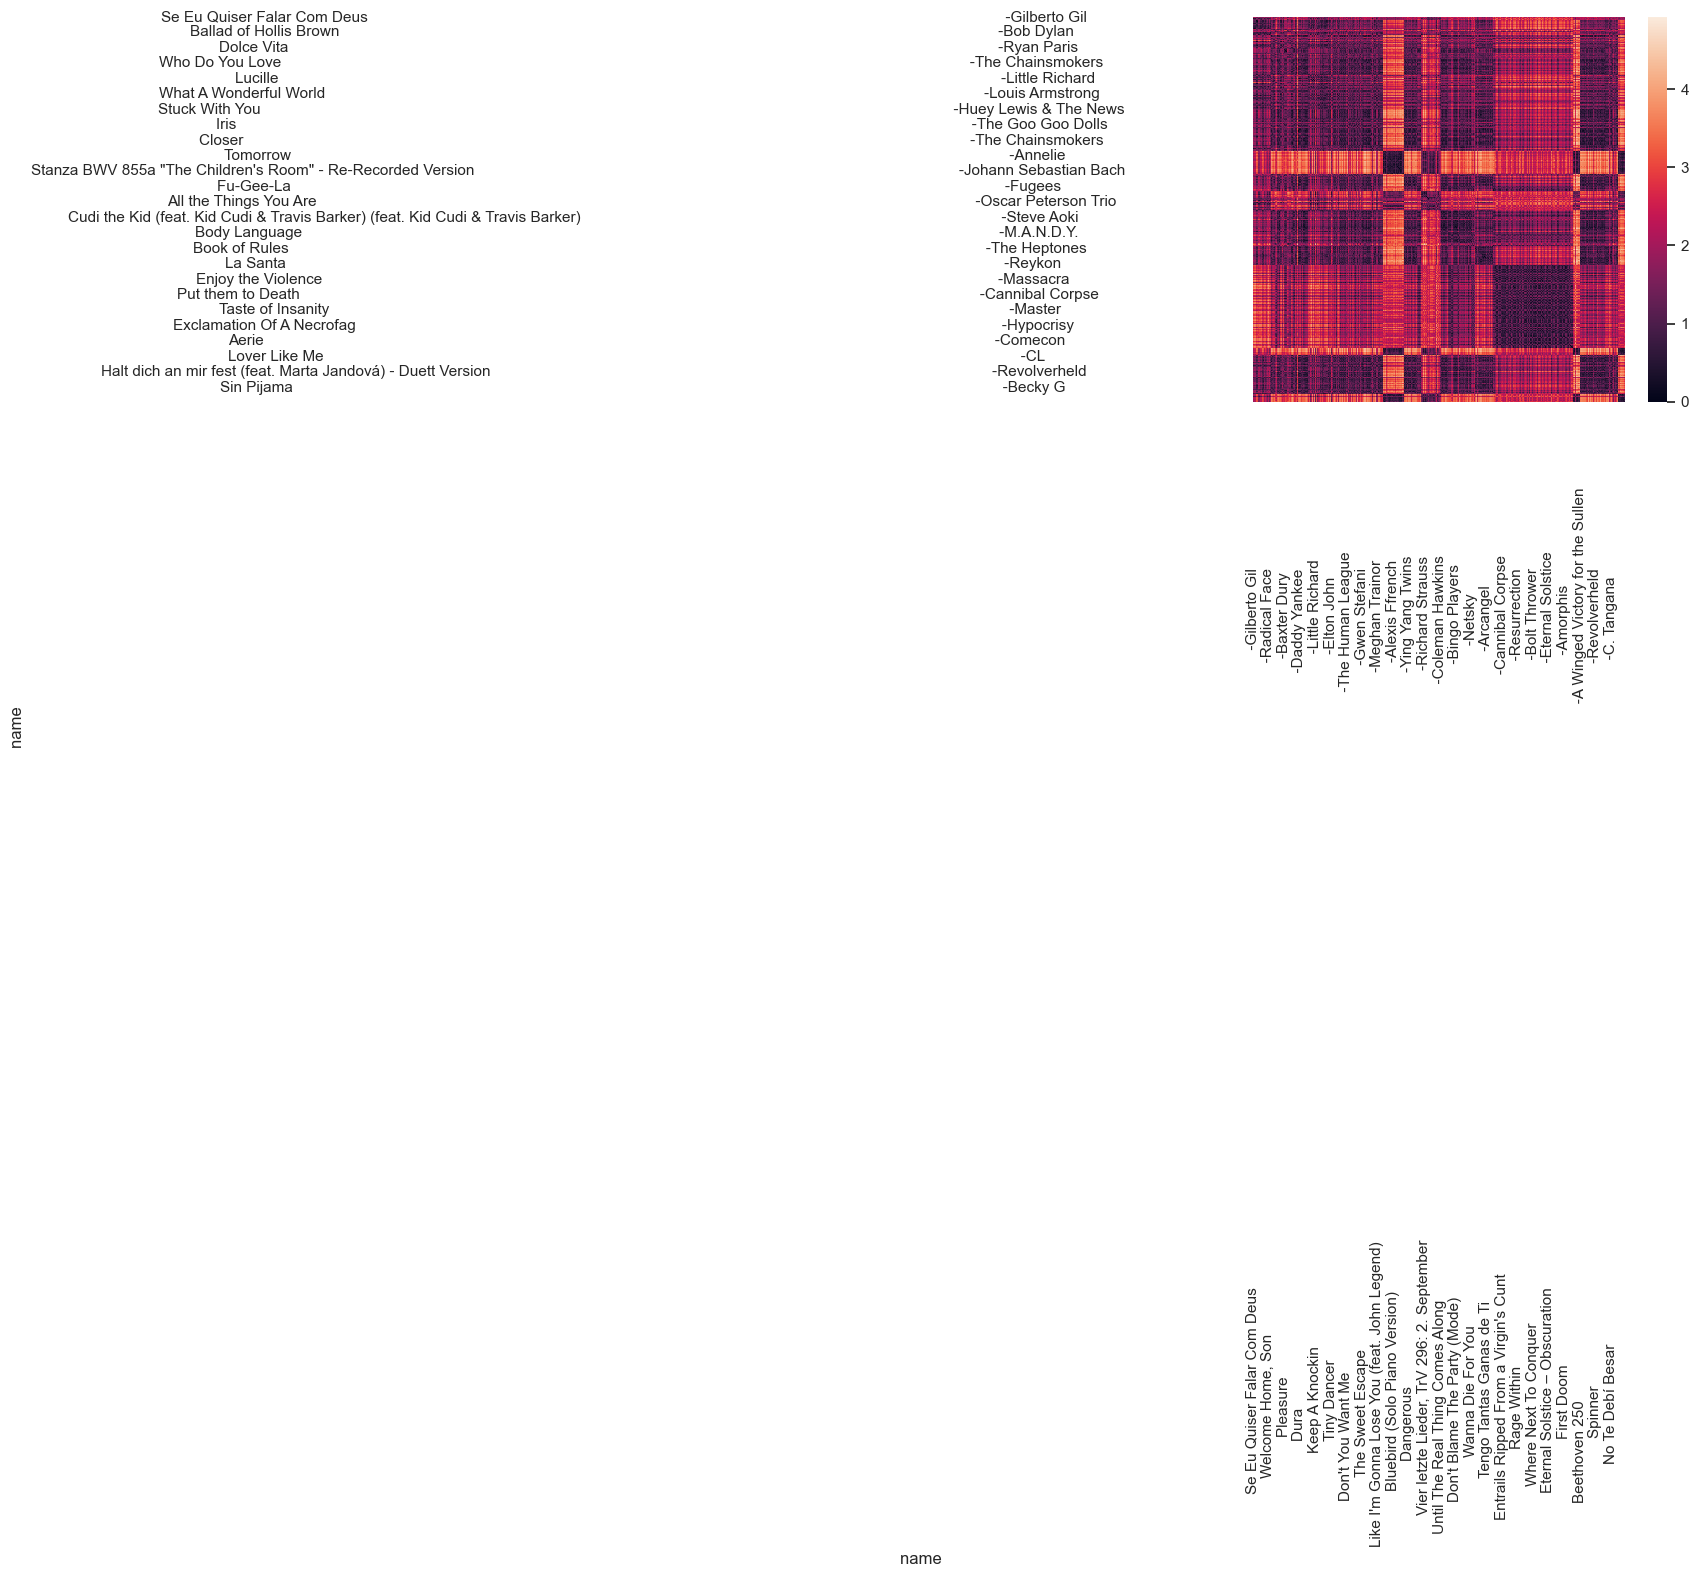

In [60]:
# Manhattan
manh_minmax = pd.DataFrame(pairwise_distances(audio_features_df_minmax, metric="manhattan"),
                    index=audio_features_df_minmax.index,
                    columns=audio_features_df_minmax.index)
manh_minmax

plt.subplots(figsize=(6, 5))
sns.heatmap(manh_minmax);

# Clustering with K-Means and exploring the playlists

From LMS:
Other interesting tasks you might want to perform in terms of cluster exploration include:
    - Looking at the size of the clusters (how many observations do they have?)
    - Plotting the distribution of an individual feature (such as “energy”) across different clusters.
    - Visualizing the clusters in a scatterplot with two different features.
    - Listening to a few songs from each cluster to get a feeling for what do these clusters contain.

In [61]:
num_clusters = 50
rand_state = 42

In [62]:
kmeans_5000_minmax = KMeans(n_clusters=num_clusters, random_state=rand_state)
audio_features_df_minmax['playlist_id'] = kmeans_5000_minmax.fit_predict(audio_features_df_minmax)

# kmeans_1000_minmax.fit(audio_features_df_minmax)
# audio_features_df_minmax['playlist_id'] = kmeans_1000_minmax.labels_
audio_features_df_minmax

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,danceability,energy,acousticness,instrumentalness,valence,tempo,playlist_id
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.696787,0.000060,0.310660,0.515800,49
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.217871,0.000002,0.703553,0.584322,9
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.454819,0.000064,0.918782,0.437862,15
Mulher Eu Sei,Chico César,0.729059,0.05020,0.882530,0.000041,0.531980,0.499098,16
Rosa Morena,Kurt Elling,0.673216,0.11900,0.919679,0.000348,0.408122,0.565171,16
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.920683,0.725888,0.066497,0.410795,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.858434,0.432487,0.036041,0.388495,13
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.954819,0.983756,0.034924,0.334469,35


## size of playlists

In [63]:
biggest_playlist_minmax = audio_features_df_minmax.groupby(by='playlist_id').count().sort_values(by='energy', ascending=False)
biggest_playlist_minmax

,danceability,energy,acousticness,instrumentalness,valence,tempo
playlist_id,,,,,,
20,238,238,238,238,238,238
43,212,212,212,212,212,212
21,205,205,205,205,205,205
2,201,201,201,201,201,201
28,194,194,194,194,194,194
32,187,187,187,187,187,187
22,174,174,174,174,174,174
4,163,163,163,163,163,163
15,154,154,154,154,154,154


## playlist at i position in the list of biggest playlists

In [64]:
plylst_id = 0
audio_features_df_minmax.loc[audio_features_df_minmax['playlist_id'] == biggest_playlist_minmax.index[plylst_id]].head(25)


,,danceability,energy,acousticness,instrumentalness,valence,tempo,playlist_id
name,artist,,,,,,,
Tirei o Chapéu,Batida,0.749741,0.927,0.000546,0.000000,0.835533,0.631160,20
Baby Lee,Teenage Fanclub,0.641158,0.761,0.139558,0.005452,0.896447,0.527020,20
The Day That Thatcher Dies,Hefner,0.595657,0.963,0.192771,0.000000,0.975635,0.641764,20
Until the Sun Explodes,The Pains Of Being Pure At Heart,0.660807,0.744,0.032028,0.000465,0.837563,0.598378,20
Got No Money,FIDLAR,0.830403,0.765,0.071586,0.000049,0.883249,0.510014,20
It's My Party,Leslie Gore,0.808687,0.764,0.185743,0.000000,0.929949,0.654479,20
Enola Gay - Remastered,Orchestral Manoeuvres In The Dark,0.639090,0.777,0.062149,0.198985,0.844670,0.485915,20
Cinnamon,Palehound,0.827301,0.907,0.046787,0.032081,0.968528,0.748320,20
Chandelier,Sia,0.628749,0.856,0.101406,0.052995,0.859898,0.560816,20


## various plots

### distribution of feature

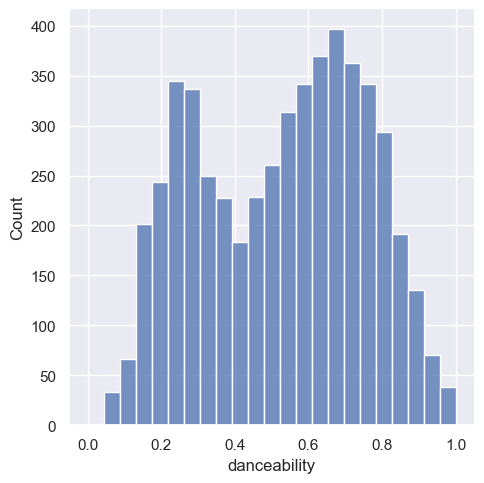

In [65]:
sns.displot(audio_features_df_minmax, x="danceability")

### 2D Scatterplot with centroids

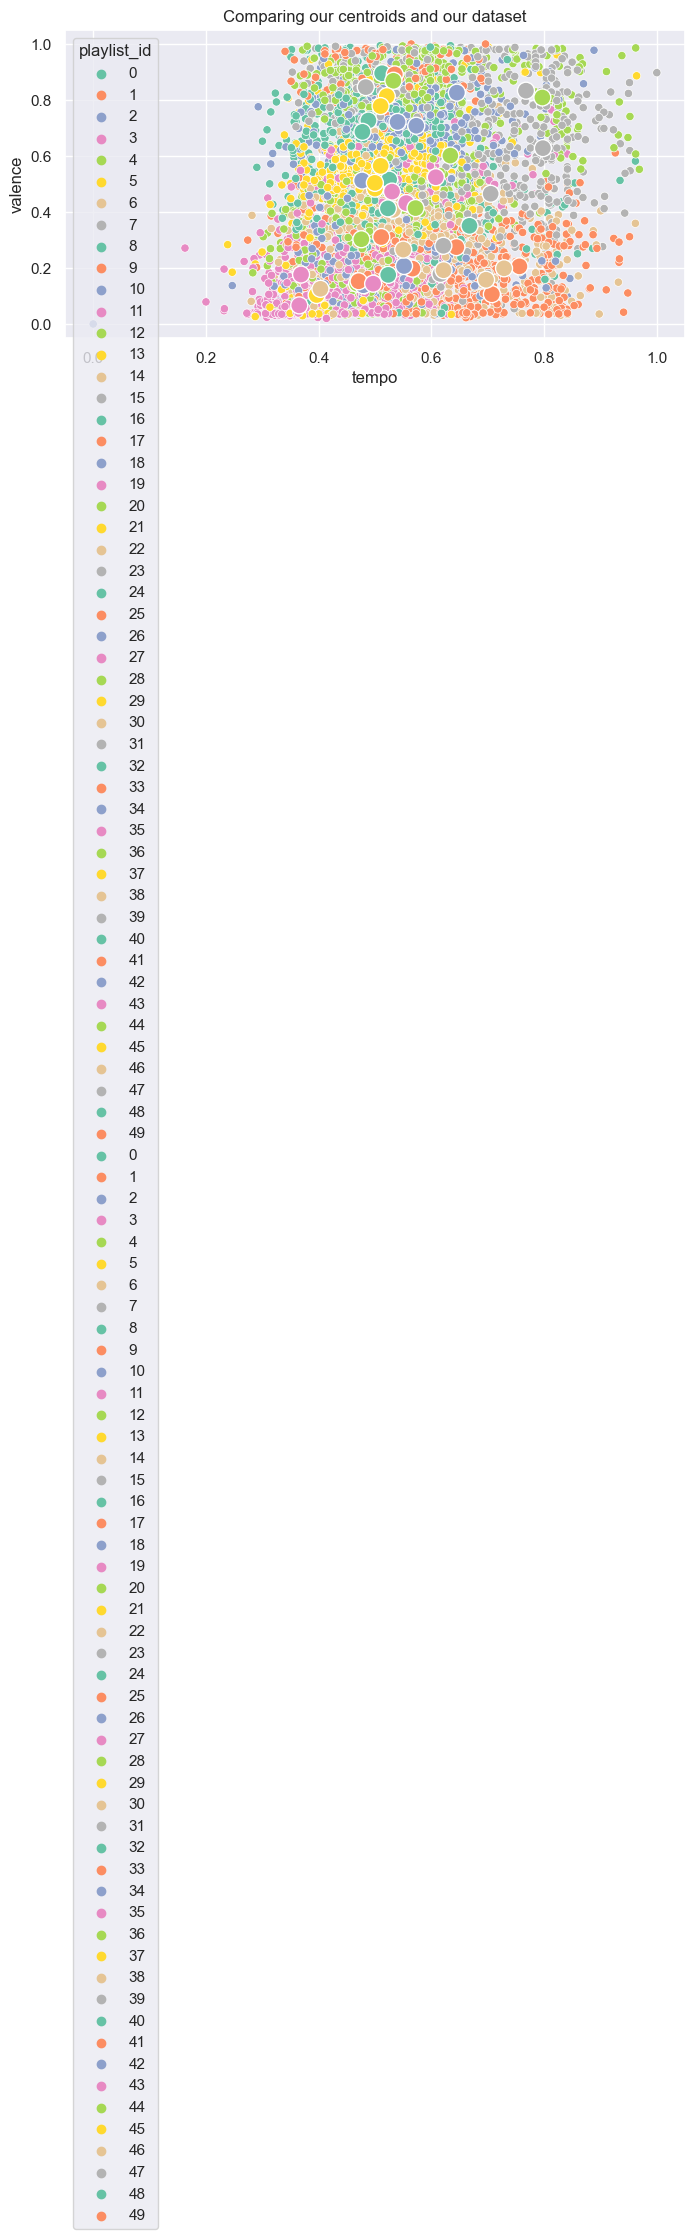

In [66]:
# Explore KMeans results

# choose audio features
feature_x = 'tempo'
feature_y = 'valence'
kmeans_plot = kmeans_5000_minmax

fig, ax = plt.subplots(figsize=(8, 4))
plot_data = audio_features_df_minmax
cl_pos = pd.DataFrame(kmeans_plot.cluster_centers_)
cl_pos.columns = plot_data.columns.drop('playlist_id')
cl_pos.reset_index(names='playlist_id', inplace=True)


plt.title('Comparing our centroids and our dataset')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
sns.scatterplot(data=plot_data, x=feature_x, y=feature_y, hue='playlist_id', palette='Set2')
sns.scatterplot(data=cl_pos, x=feature_x, y=feature_y, hue='playlist_id', palette='Set2', s=150)
sns.set(rc={'figure.figsize':(10,20)})
plt.show()

### 3D Scatterplot with centroids (NOT FINISHED)

### Spider chart

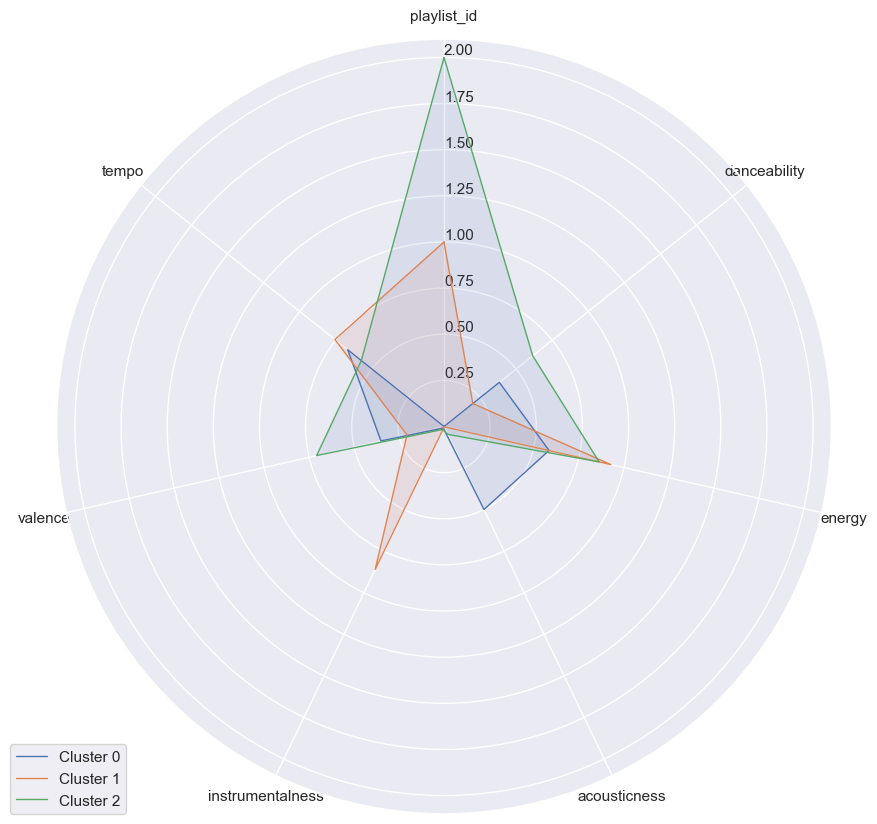

In [67]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# Libraries
from math import pi

# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})

# ------- PART 1: Create background

# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)


# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

# Defining a number of playlists
🧩 Your task is to define the number of clusters (i.e. the number of playlists) you will create.

In our case, you have been asked to create playlists and you have not been given a hard limit for the number of playlists, but you have been asked to keep the size of all the playlists between 50 and 250 songs. 
If you have a dataset with roughly 5000 songs, that means that you should explore having between 20 and 100 clusters.

## Inertia evolution

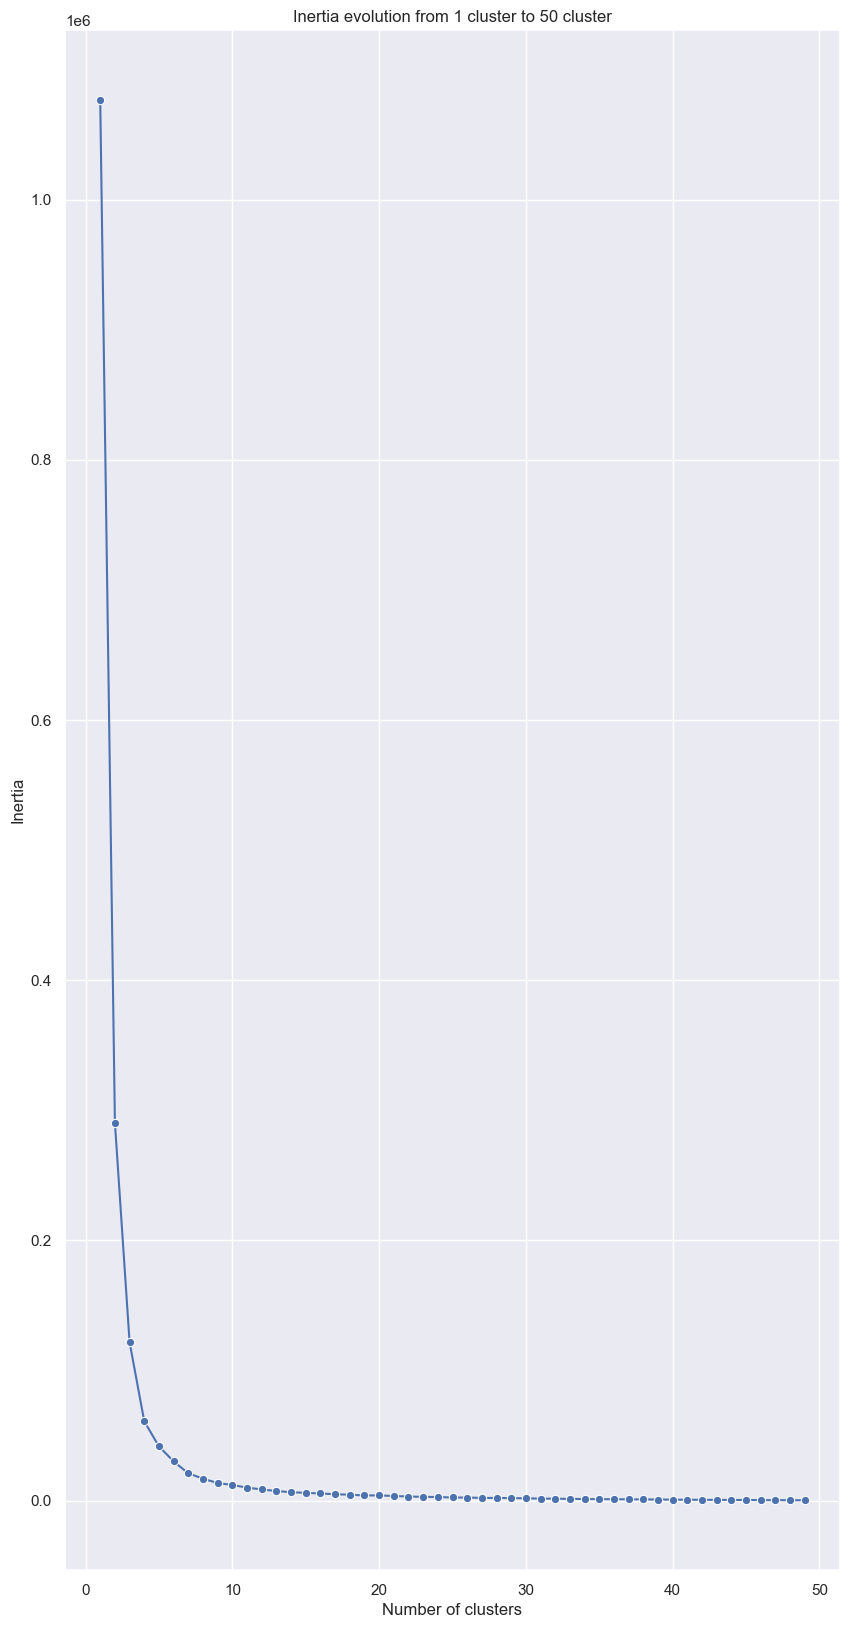

In [68]:
max_k = 50
inertia_list = []

for k in range(1, max_k):
    inertia_list.append(KMeans(n_clusters=k, n_init=5).fit(audio_features_df_minmax).inertia_)
    
# fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia_list, marker='o')
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Inertia drop evolution
introduced to find an elbow

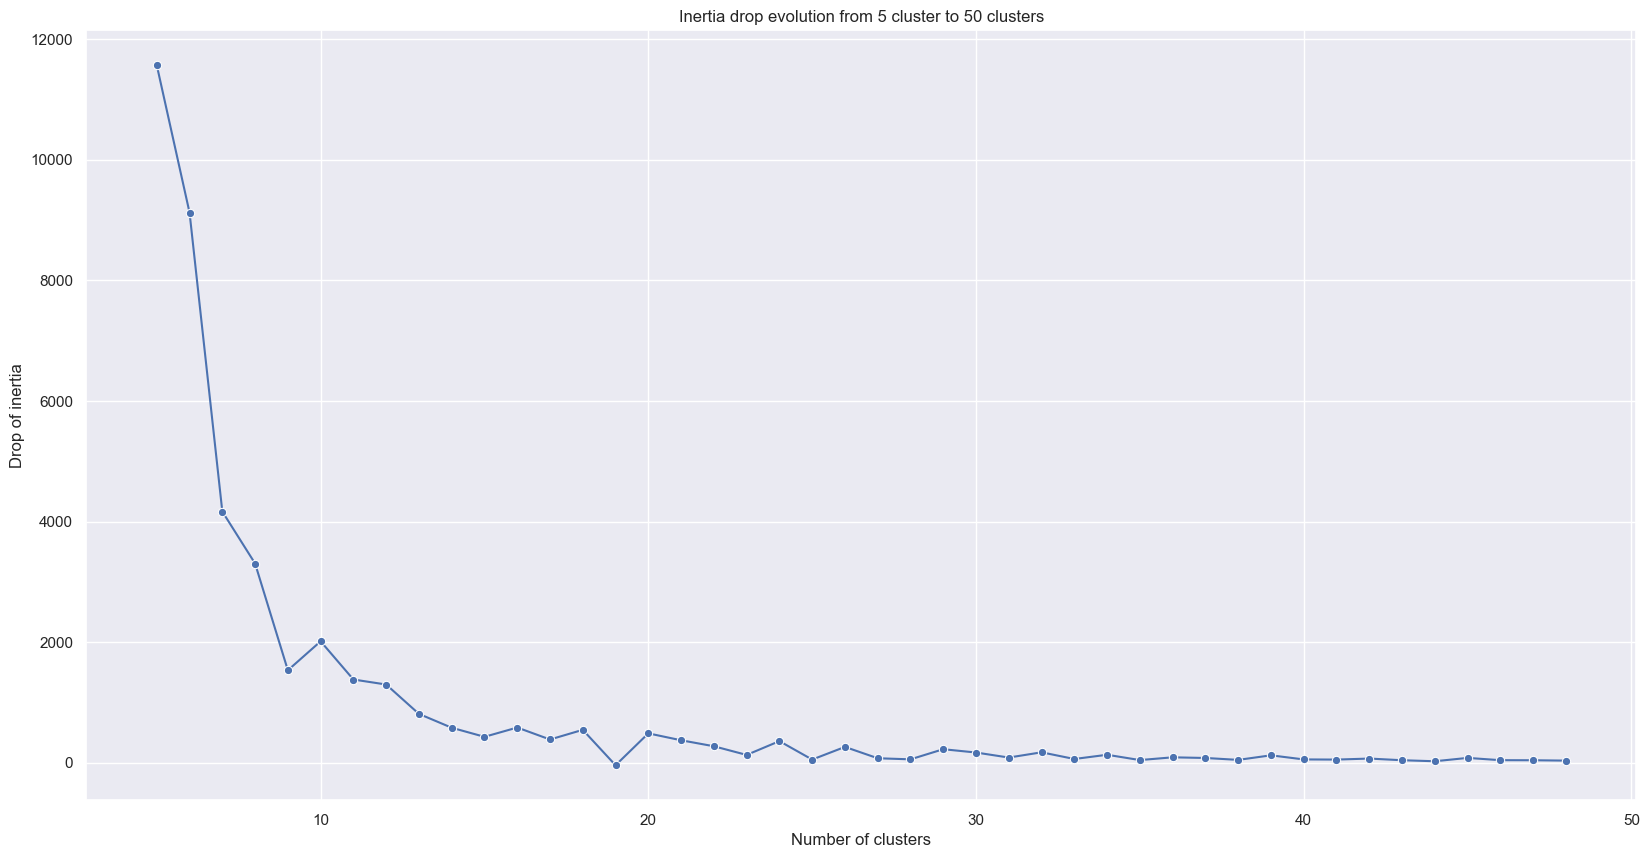

In [69]:
inertia_list_temp = [0]
for k in range(1, max_k-1):
    a = inertia_list[k-1] - inertia_list[k] # taangle of curve
    inertia_list_temp.append(a)

starting_index = 5

sns.lineplot(x=range(starting_index, max_k-1), y=inertia_list_temp[starting_index:], marker='o')
sns.set(rc={'figure.figsize':(20,10)})
plt.title(f'Inertia drop evolution from {starting_index} cluster to {max_k} clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Drop of inertia')
plt.show()

## Silhouette score evolution

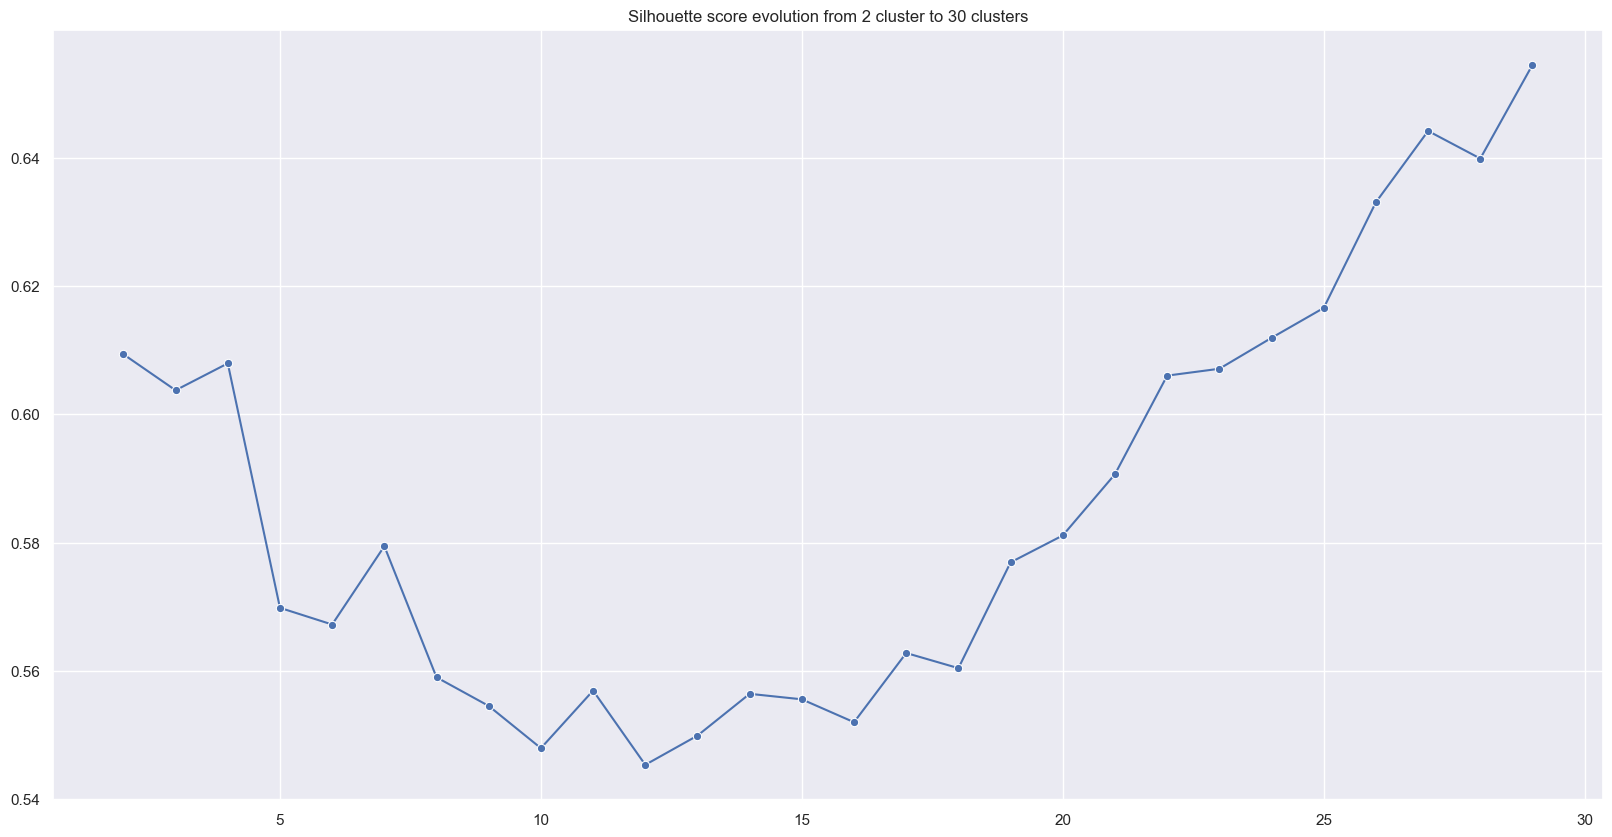

In [70]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(audio_features_df_minmax, kmeans_5000_minmax.labels_)
sil_score = []
max_k = 30

for k in range(2, max_k):
    labels = KMeans(n_clusters=k, n_init=5).fit(audio_features_df_minmax).labels_
    sil_score.append(silhouette_score(audio_features_df_minmax, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

## Silhouette diagrams (knife diagram)

* For k = 6 the average to silhouette is: 0.5724
	- For cluster = 0 the silhouette value is: 0.57
	- For cluster = 1 the silhouette value is: 0.66
	- For cluster = 2 the silhouette value is: 0.6
	- For cluster = 3 the silhouette value is: 0.62
	- For cluster = 4 the silhouette value is: 0.54
	- For cluster = 5 the silhouette value is: 0.42
* For k = 7 the average to silhouette is: 0.582
	- For cluster = 0 the silhouette value is: 0.53
	- For cluster = 1 the silhouette value is: 0.52
	- For cluster = 2 the silhouette value is: 0.62
	- For cluster = 3 the silhouette value is: 0.59
	- For cluster = 4 the silhouette value is: 0.66
	- For cluster = 5 the silhouette value is: 0.57
	- For cluster = 6 the silhouette value is: 0.58
* For k = 8 the average to silhouette is: 0.5587
	- For cluster = 0 the silhouette value is: 0.66
	- For cluster = 1 the silhouette value is: 0.58
	- For cluster = 2 the silhouette value is: 0.56
	- For cluster = 3 the silhouette value is: 0.55
	- For cluster = 4 the

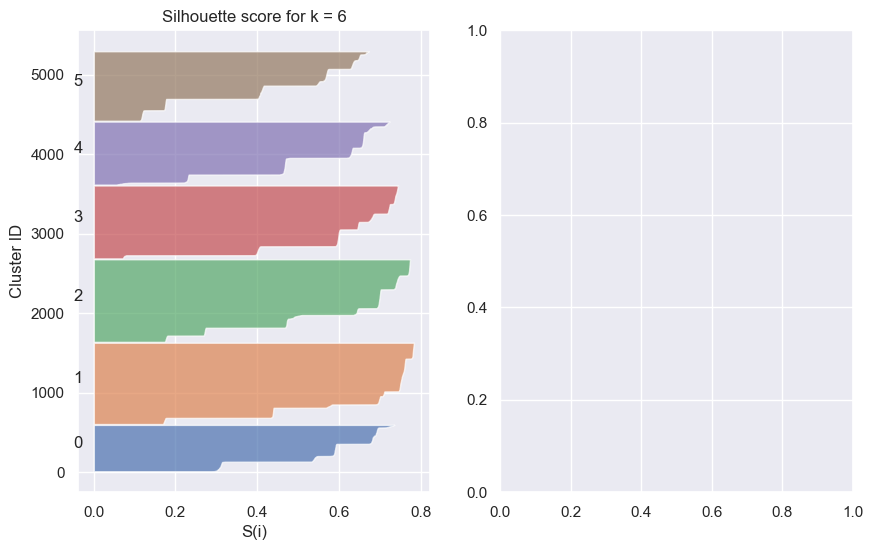

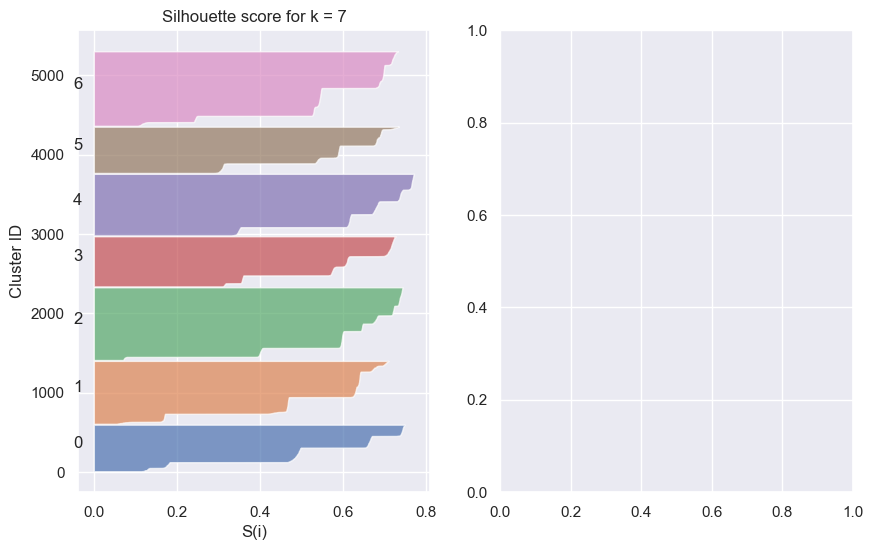

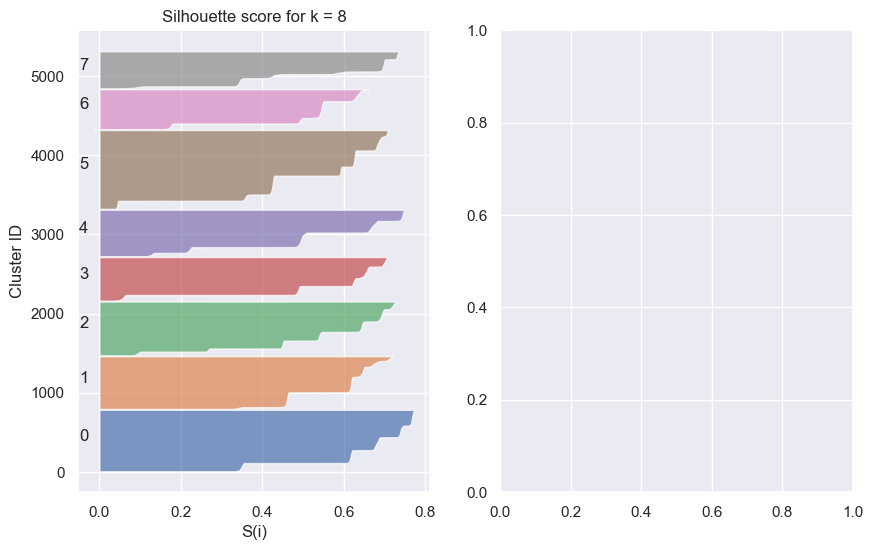

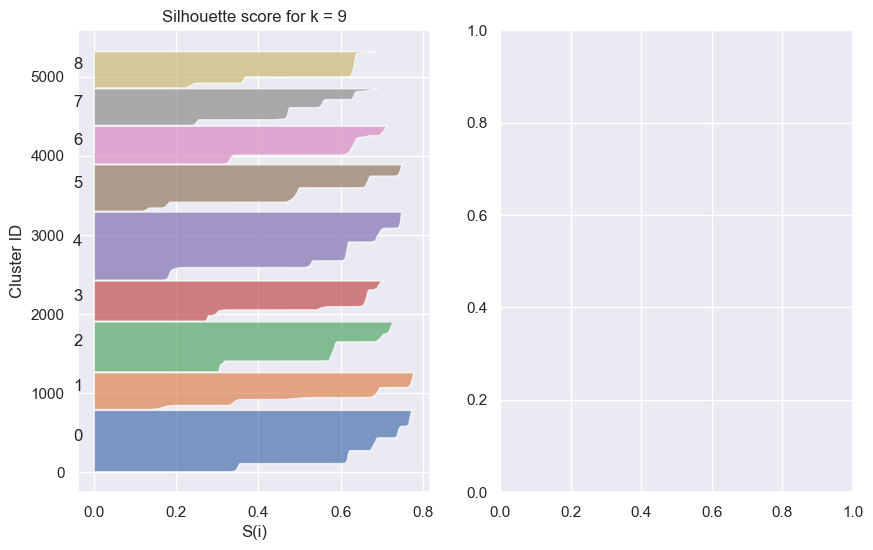

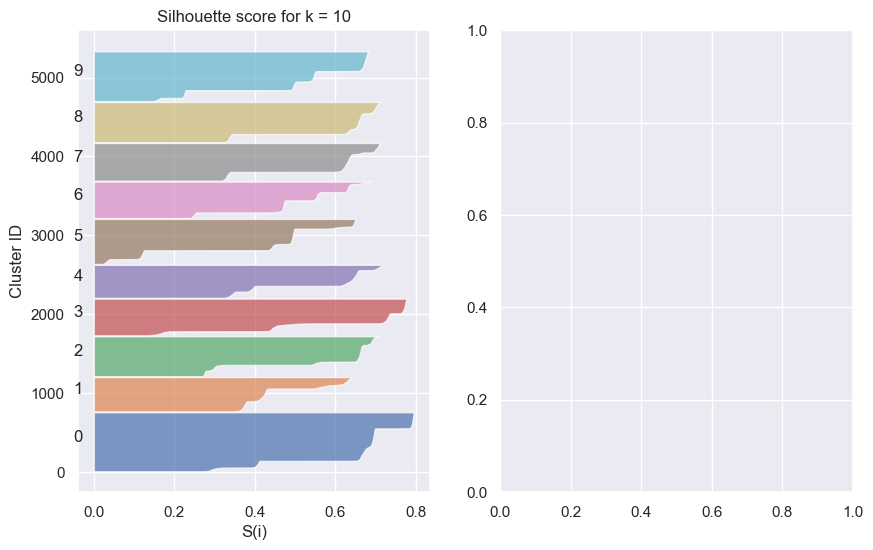

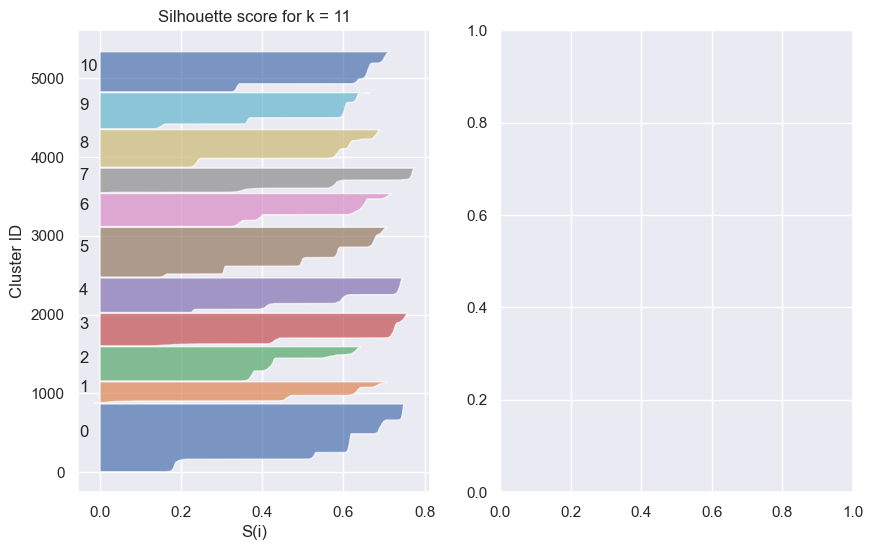

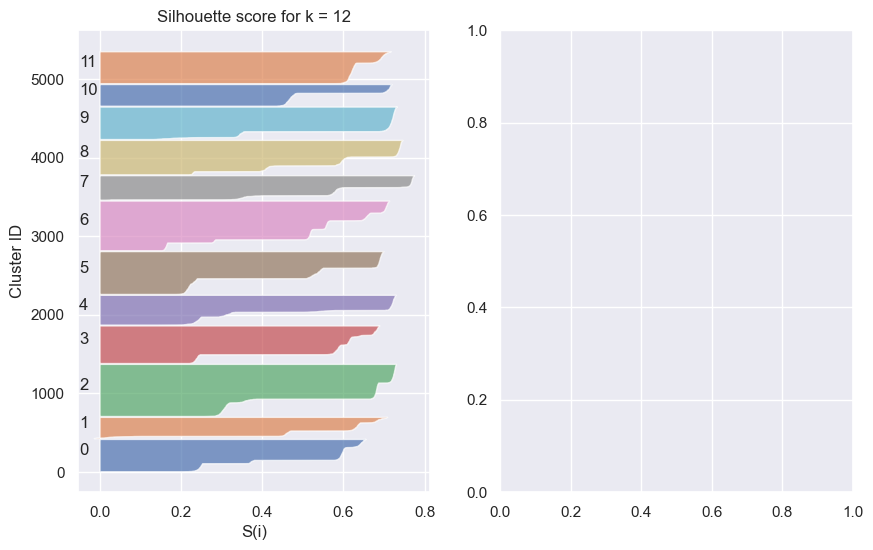

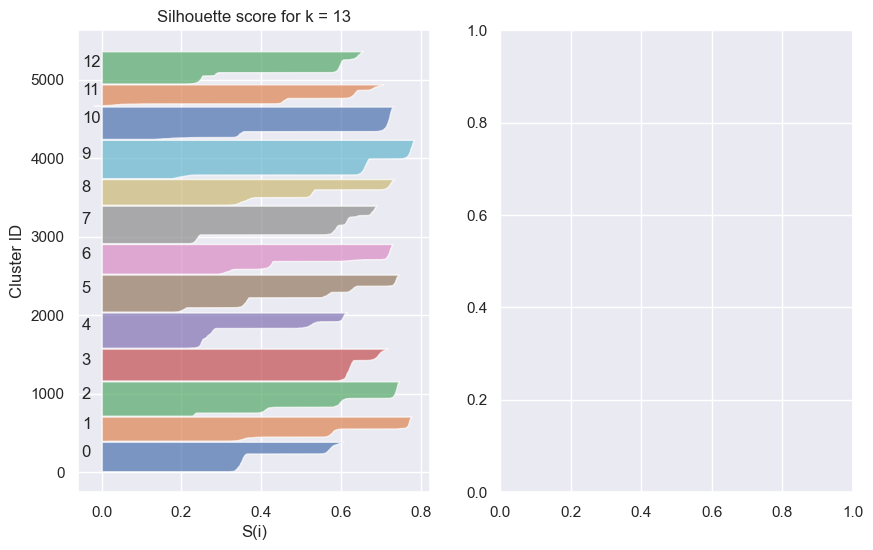

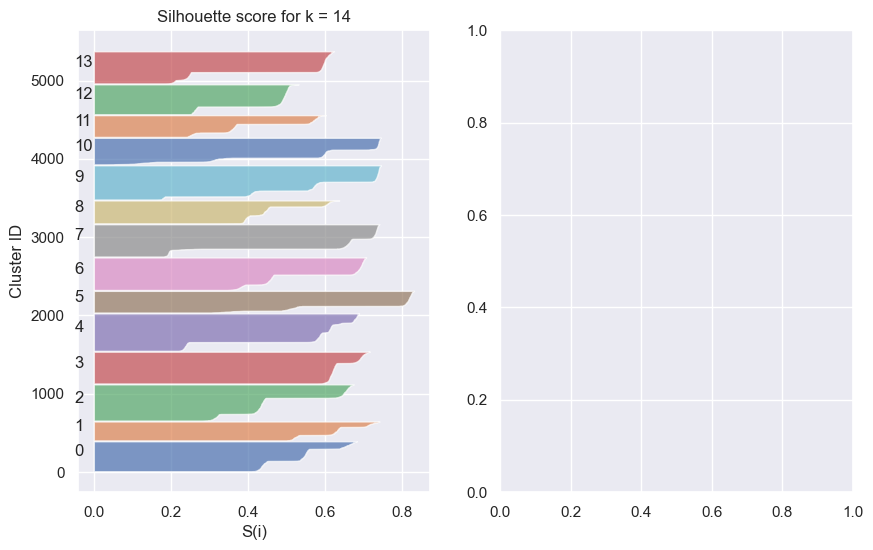

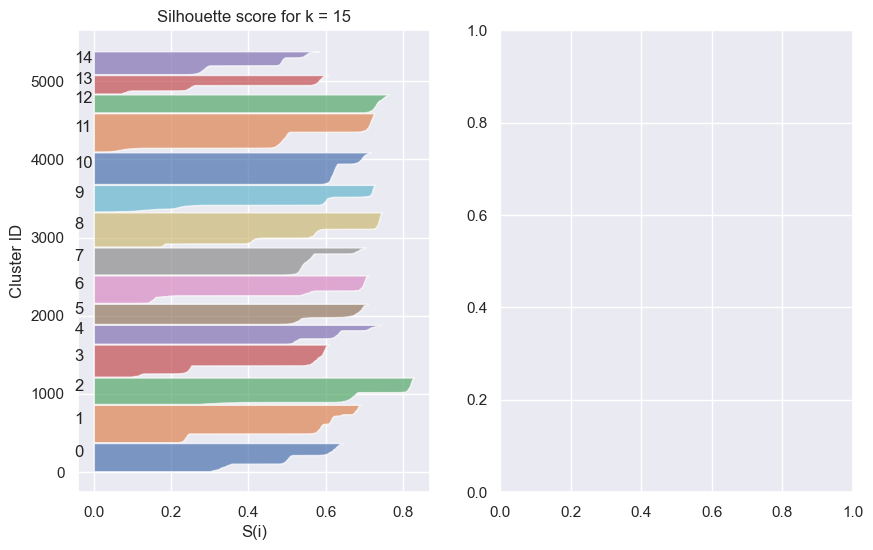

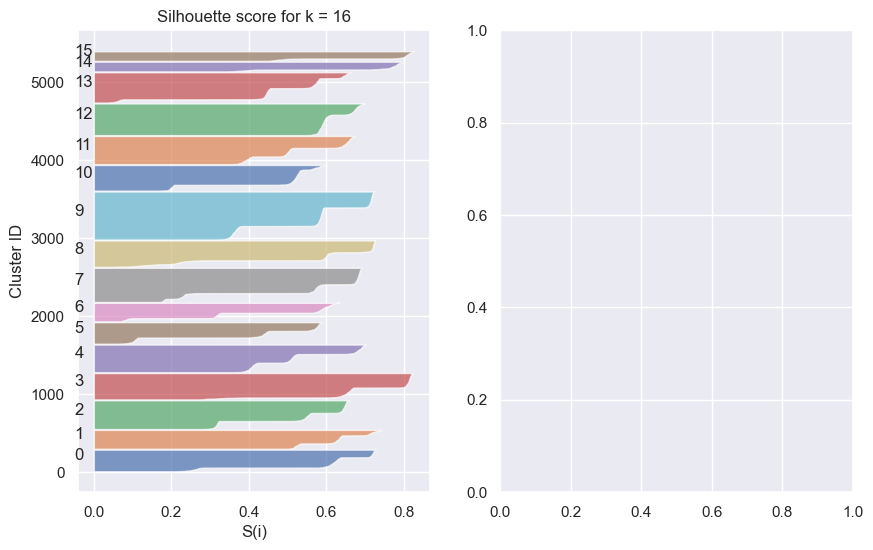

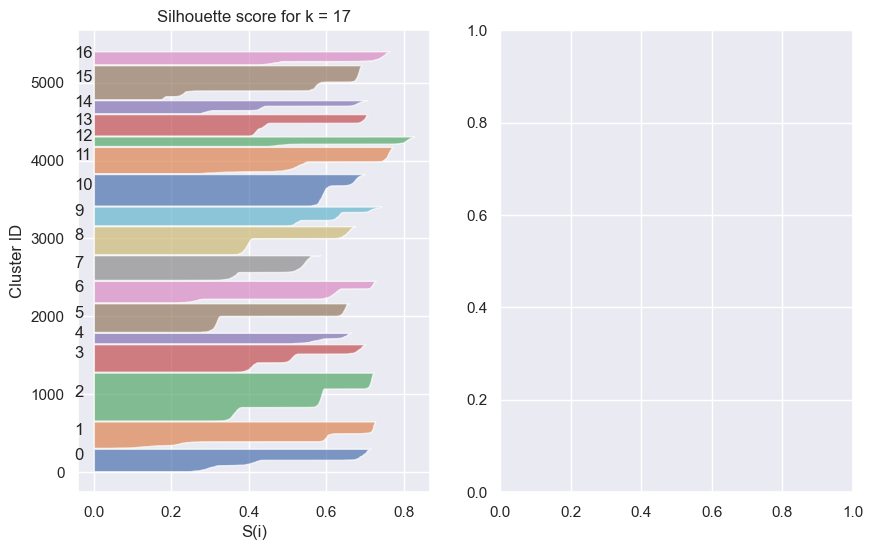

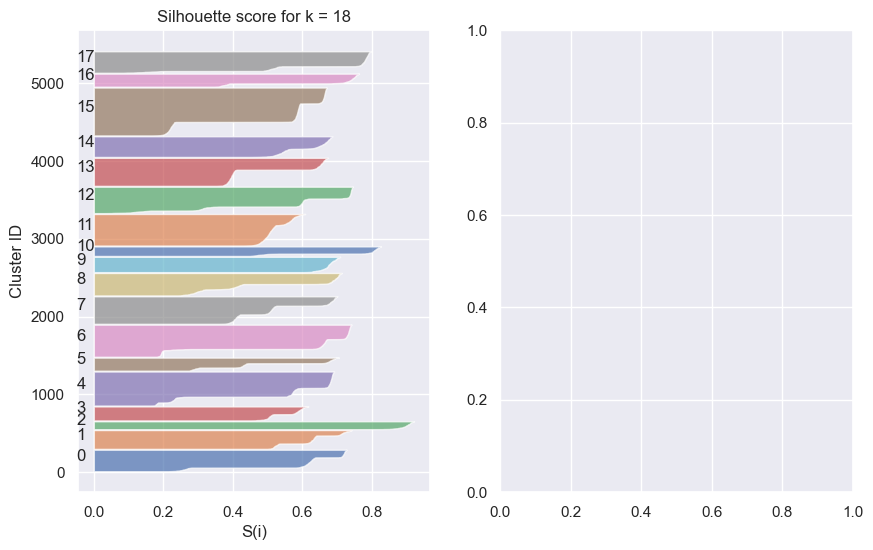

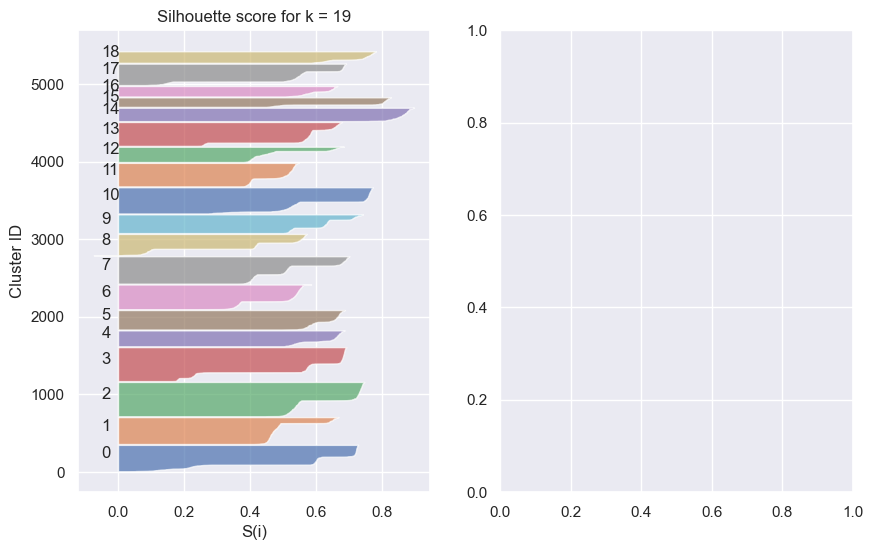

In [71]:
max_k = 20
min_k = 6
data = audio_features_df_minmax

for k in range(min_k, max_k):
    kmean_model = KMeans(n_clusters=k, n_init=5).fit(data)
    labels = kmean_model.labels_

    if 1 < k < data.shape[0]:

        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 6)

        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)

        y_lower = 10

        for i in range(k):
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")

            ith_cluster_sv.sort()

            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size


            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv,
                                alpha = 0.7)


            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))

            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation

        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

# Iteration with the newly defined k

In [72]:
num_clusters = 16
rand_state = 42

In [73]:
kmeans_5000_minmax = KMeans(n_clusters=num_clusters)
audio_features_df_minmax['playlist_id'] = kmeans_5000_minmax.fit_predict(audio_features_df_minmax)
audio_features_df_minmax

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,danceability,energy,acousticness,instrumentalness,valence,tempo,playlist_id
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.696787,0.000060,0.310660,0.515800,10
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.217871,0.000002,0.703553,0.584322,0
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.454819,0.000064,0.918782,0.437862,5
Mulher Eu Sei,Chico César,0.729059,0.05020,0.882530,0.000041,0.531980,0.499098,5
Rosa Morena,Kurt Elling,0.673216,0.11900,0.919679,0.000348,0.408122,0.565171,5
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.920683,0.725888,0.066497,0.410795,13
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.858434,0.432487,0.036041,0.388495,13
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.954819,0.983756,0.034924,0.334469,11


In [74]:
biggest_playlist_minmax = audio_features_df_minmax.groupby(by='playlist_id').count().sort_values(by='energy', ascending=False)
biggest_playlist_minmax

,danceability,energy,acousticness,instrumentalness,valence,tempo
playlist_id,,,,,,
4,510,510,510,510,510,510
3,443,443,443,443,443,443
14,436,436,436,436,436,436
12,372,372,372,372,372,372
2,365,365,365,365,365,365
5,362,362,362,362,362,362
1,339,339,339,339,339,339
9,330,330,330,330,330,330
11,319,319,319,319,319,319


In [75]:
plylst_id = 0
audio_features_df_minmax.loc[audio_features_df_minmax['playlist_id'] == biggest_playlist_minmax.index[plylst_id]].sample(50)


,,danceability,energy,acousticness,instrumentalness,valence,tempo,playlist_id
name,artist,,,,,,,
Das alles ändert nichts daran - Radio Version,Maya Saban,0.564633,0.72200,0.485944,0.000000,0.294416,0.654017,4
The Nights,Avicii,0.544984,0.83500,0.016667,0.000000,0.663959,0.588733,4
My Kiss,The Wave Pictures,0.373320,0.63800,0.395582,0.013706,0.313706,0.576821,4
Warriors Trial,Amorphis,0.171665,0.95000,0.000012,0.852792,0.109645,0.692359,4
DJ Got Us Fallin' In Love,Usher,0.688728,0.87800,0.030120,0.000000,0.679188,0.560456,4
Smells Like Teen Spirit,Nirvana,0.519131,0.91200,0.000026,0.000176,0.730964,0.545638,4
No Destiny,Edge Of Sanity,0.193382,0.99000,0.000004,0.863959,0.393909,0.761391,4
Talking to the Moon,Bruno Mars,0.514995,0.59000,0.513052,0.000000,0.079594,0.681653,4
I Still Haven't Found What I'm Looking For - Remastered 2007,U2,0.584281,0.76400,0.013956,0.004954,0.696447,0.471475,4


# Dividing playlists into sub-playlists

In [76]:
df_test = audio_features_df_minmax.loc[audio_features_df_minmax['playlist_id'] == biggest_playlist_minmax.index[plylst_id]].sample(50)
df_test.drop('playlist_id', axis=1, inplace=True)
kmeans_test = KMeans(n_clusters=3)
df_test['playlist_id'] = kmeans_test.fit_predict(df_test)
df_test

/Users/nursahkurt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,danceability,energy,acousticness,instrumentalness,valence,tempo,playlist_id
name,artist,,,,,,,
Warriors Trial,Amorphis,0.171665,0.95000,0.000012,0.852792,0.109645,0.692359,2
Fucked With A Knife,Cannibal Corpse,0.171665,0.97700,0.000006,0.942132,0.431472,0.856559,2
Before You Go - Piano Version,Flying Fingers,0.360910,0.11800,0.983936,0.923858,0.075431,0.496014,1
Ineffectual Condition,Desecrator,0.201655,0.96900,0.001898,0.920812,0.240609,0.798481,2
Ashes of Mourning Life,God Macabre,0.152017,0.88400,0.000001,0.881218,0.489340,0.807879,2
Dancing On The Ceiling,Lionel Richie,0.721820,0.77400,0.120482,0.000002,0.742132,0.622445,0
Sunrise in Montmartre,Henry Smith,0.425026,0.15500,0.992972,0.967513,0.258883,0.338918,1
Do While ⌘X,Oval,0.318511,0.25100,0.950803,0.938071,0.395939,0.362054,1
Piano Man,Billy Joel,0.342296,0.55000,0.607430,0.000004,0.435533,0.830572,0


In [89]:
df_test.loc[df_test['playlist_id'] == 1].head(50)

,,danceability,energy,acousticness,instrumentalness,valence,tempo,playlist_id
name,artist,,,,,,,
Before You Go - Piano Version,Flying Fingers,0.360910,0.11800,0.983936,0.923858,0.075431,0.496014,1
Sunrise in Montmartre,Henry Smith,0.425026,0.15500,0.992972,0.967513,0.258883,0.338918,1
Do While ⌘X,Oval,0.318511,0.25100,0.950803,0.938071,0.395939,0.362054,1
Apelo,Brazilian Jazz,0.523268,0.25200,0.922691,0.876142,0.203046,0.350096,1
Just the Way You Are,Andy Stringer,0.510858,0.04070,0.994980,0.963452,0.149239,0.490514,1
Hurt,2CELLOS,0.374354,0.20800,0.931727,0.919797,0.303553,0.361255,1
Polka Dots And Moonbeams - Remastered,Bud Powell,0.577042,0.08910,0.949799,0.938071,0.131980,0.469756,1
Nature Boy,Jan Johansson,0.452947,0.18200,0.986948,0.853807,0.064873,0.306253,1
Suite for Variety Orchestra: Waltz 2 (Arr. for 12 Cellos),Dmitri Shostakovich,0.266805,0.07030,0.917671,0.952284,0.351269,0.428109,1
